In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/Project

/content/drive/MyDrive/Project


In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16567, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 16567 (delta 23), reused 31 (delta 13), pack-reused 16522
Receiving objects: 100% (16567/16567), 15.02 MiB | 10.31 MiB/s, done.
Resolving deltas: 100% (11382/11382), done.
Updating files: 100% (148/148), done.


In [7]:
%cd yolov5/

/content/drive/MyDrive/Project/yolov5


In [8]:
%pip install -qr requirements.txt

In [9]:
import torch
import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-304-g22361691 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)


Setup complete ✅ (16 CPUs, 62.8 GB RAM, 30.0/201.2 GB disk)


In [10]:
from PIL import Image, ImageDraw
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import shutil

In [13]:
!pwd

/content/drive/MyDrive/Project/yolov5


In [17]:
!python train.py --img 416 --cfg YoloSENet.yaml --hyp hyp.scratch-low.yaml --batch 16 --epochs 100 --data /content/drive/MyDrive/Project/My-proroject-1/data.yaml --weights yolov5s.pt --name yolo_mixedfinal_se_det


2024-05-22 18:59:14.094317: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-22 18:59:14.094367: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-22 18:59:14.096352: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=YoloSENet.yaml, data=/content/drive/MyDrive/Project/My-proroject-1/data.yaml, hyp=hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, 

In [18]:
# Run evaluation
!python detect.py --weights '/content/drive/MyDrive/Project/yolov5/runs/train/yolo_mixedfinal_se_det3/weights/best.pt' --conf 0.5 --source /content/drive/MyDrive/Project/My-proroject-1/test/images

detect: weights=['/content/drive/MyDrive/Project/yolov5/runs/train/yolo_mixedfinal_se_det3/weights/best.pt'], source=/content/drive/MyDrive/Project/My-proroject-1/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-304-g22361691 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)

Fusing layers... 
YoloSENet summary: 163 layers, 7191135 parameters, 0 gradients, 16.0 GFLOPs
image 1/23 /content/drive/MyDrive/Project/My-proroject-1/test/images/Im010_1_jpg.rf.bc0f6d1ee73253e44f95cad10834aa45.jpg: 640x640 (no detections), 7.4ms
image 2/23 /content/drive/MyDrive/Project/My-proroject-1/test/images/Im027_1

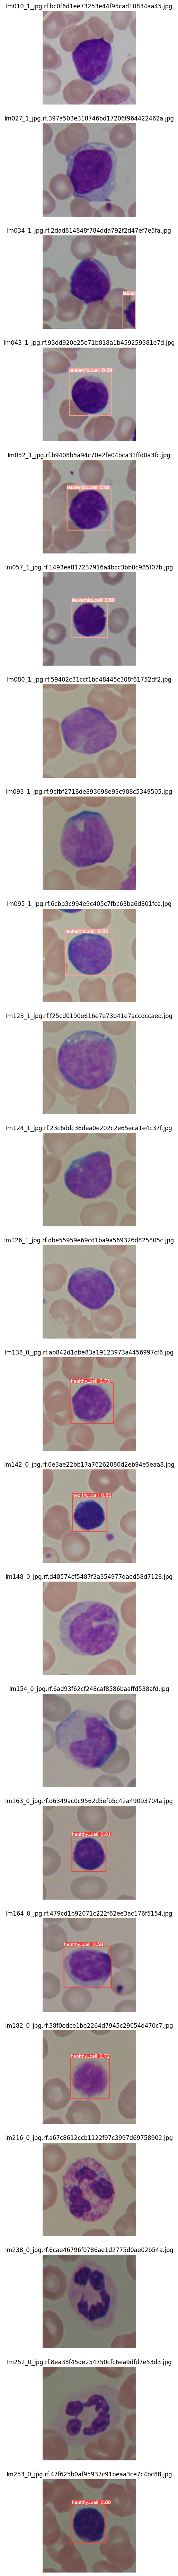

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the folder containing the images
folder_path = "/content/drive/MyDrive/Project/yolov5/runs/detect/exp"

# List all image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Display images
fig = plt.figure(figsize=(150, 100))
columns = 1
rows = len(image_files) // columns + 1
for i, file in enumerate(image_files):
    img = mpimg.imread(os.path.join(folder_path, file))
    ax = fig.add_subplot(rows, columns, i+1)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(file)
plt.show()

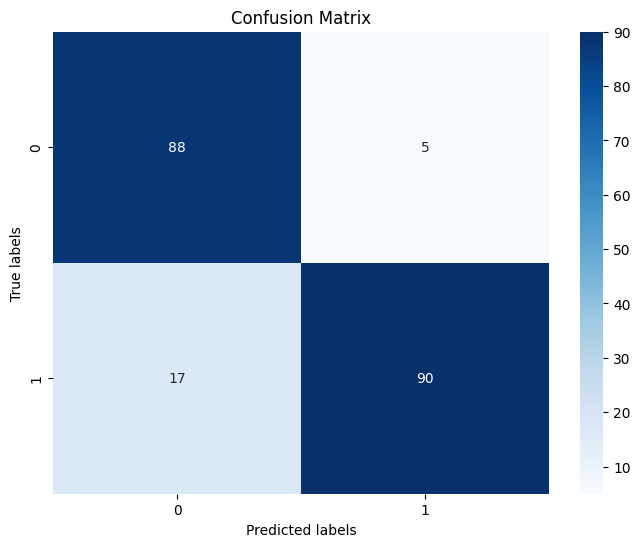

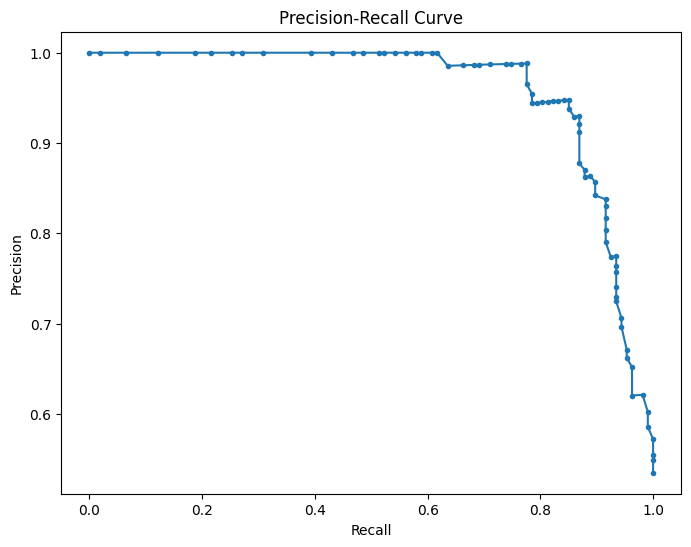

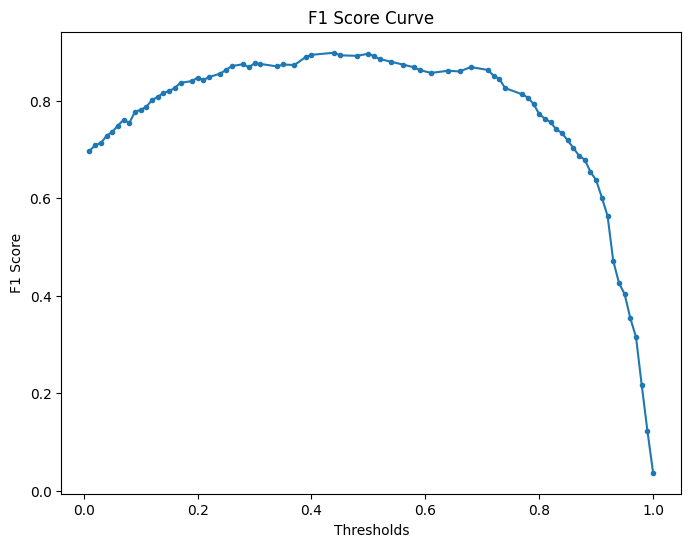

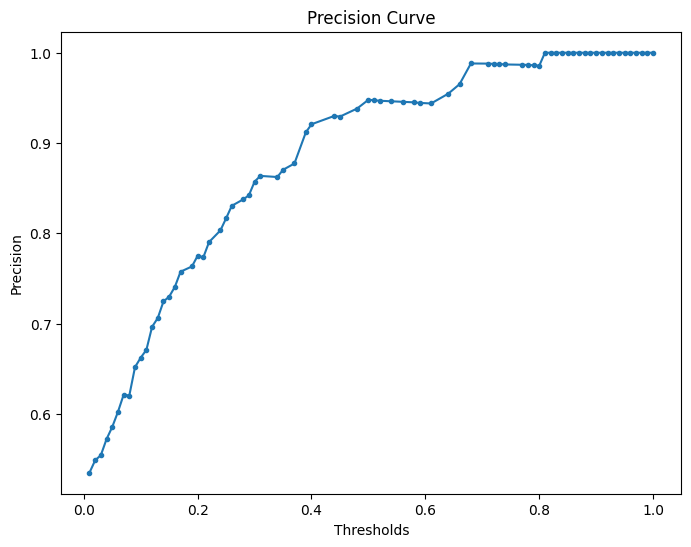

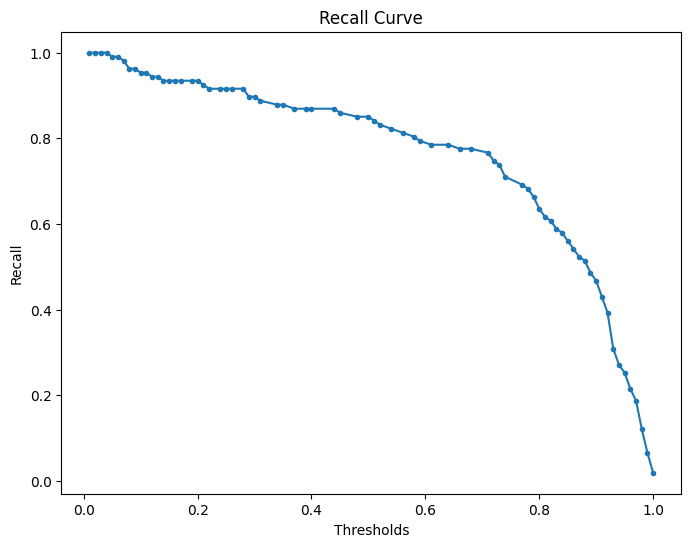

Accuracy Score: 0.89


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    precision_recall_curve,
    f1_score,
    auc,
    roc_curve,
    accuracy_score,
    recall_score,
    precision_score,
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)[:, 1]

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.show()

# Precision-Recall Curve
def plot_precision_recall_curve(y_true, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker=".")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.show()

# F1 Curve
def plot_f1_curve(y_true, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    f1 = 2 * (precision * recall) / (precision + recall)
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, f1[:-1], marker=".")
    plt.xlabel("Thresholds")
    plt.ylabel("F1 Score")
    plt.title("F1 Score Curve")
    plt.show()

# Precision Curve
def plot_precision_curve(y_true, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, precision[:-1], marker=".")
    plt.xlabel("Thresholds")
    plt.ylabel("Precision")
    plt.title("Precision Curve")
    plt.show()

# Recall Curve
def plot_recall_curve(y_true, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, recall[:-1], marker=".")
    plt.xlabel("Thresholds")
    plt.ylabel("Recall")
    plt.title("Recall Curve")
    plt.show()

# Accuracy Score
def print_accuracy(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    print(f"Accuracy Score: {acc}")

# Call functions
plot_confusion_matrix(y_test, y_pred)
plot_precision_recall_curve(y_test, y_scores)
plot_f1_curve(y_test, y_scores)
plot_precision_curve(y_test, y_scores)
plot_recall_curve(y_test, y_scores)
print_accuracy(y_test, y_pred)
